# Introduction

## Overview
The study aims to analyze the patterns, disparities, and media representation of jail deaths in the United States. Using various visualizations, including line graphs, pie charts, and bar charts, the study examines the temporal trends, demographic breakdowns, causes, and geographic distribution of jail deaths. Additionally, the study explores the common themes and narratives in media coverage of these deaths. By integrating quantitative data analysis with qualitative text analysis, the study provides a comprehensive understanding of jail deaths and their portrayal in the media.

## Research Question
The research topic explores Jail Deaths in the United States, particularly this question:
**What are the key patterns and disparities in jail deaths in the United States, and how are these deaths represented in media coverage?**

## Motivation
As someone deeply invested in technology for social good, I am motivated by the potential of this study to make a real-world impact. The issue of jail deaths is not just a statistical concern; it touches on human rights, social justice, and the need for systemic reform. By bringing to light the patterns and disparities in jail deaths, I hope to contribute to efforts aimed at protecting the most vulnerable in our society. Furthermore, examining media coverage of these deaths can help ensure that public discourse is informed by accurate data, leading to more compassionate and effective policies.

## Sources
* All the data visualizations come from the following [dataset](https://www.reuters.com/investigates/special-report/usa-jails-graphic/), provided by Reuters, which contains data from 523 jails spanning the years from 2008 to 2019.

# Data and Analysis
## Number of Deaths Per Year

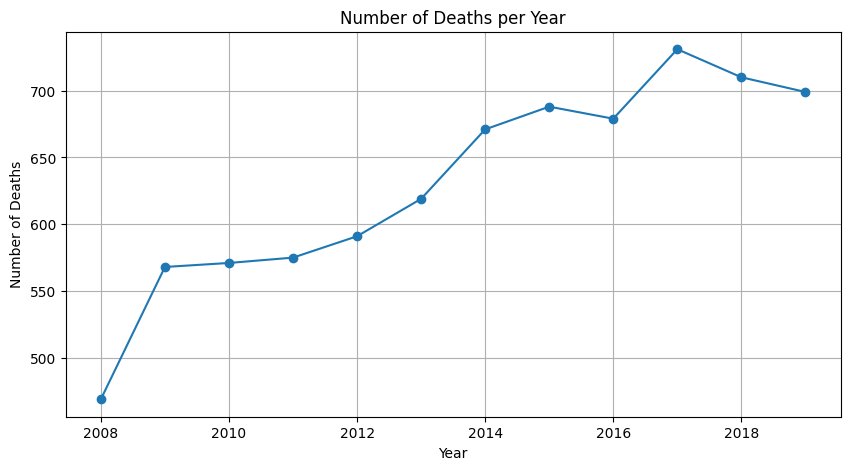

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = '~/Documents/college/dgt-hum-140/jail-deaths.csv'
df = pd.read_csv(file_path, encoding='ISO-8859-1')

year_counts = df['year'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
plt.plot(year_counts.index, year_counts.values, marker='o')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per Year')
plt.grid(True)
plt.show()

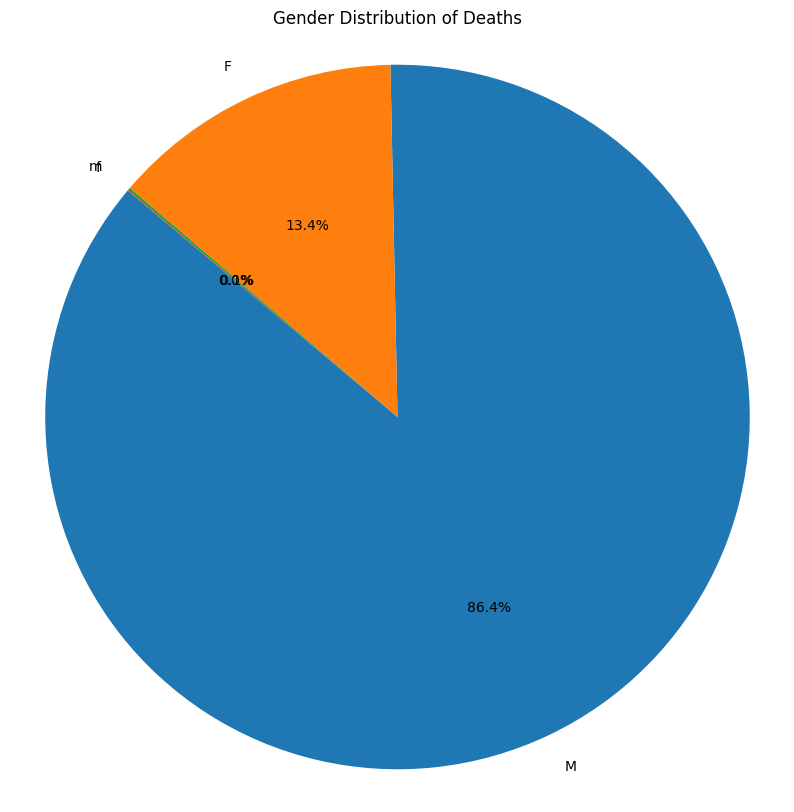

In [35]:
gender_counts = df['gender'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Gender Distribution of Deaths')
plt.axis('equal')
plt.show()

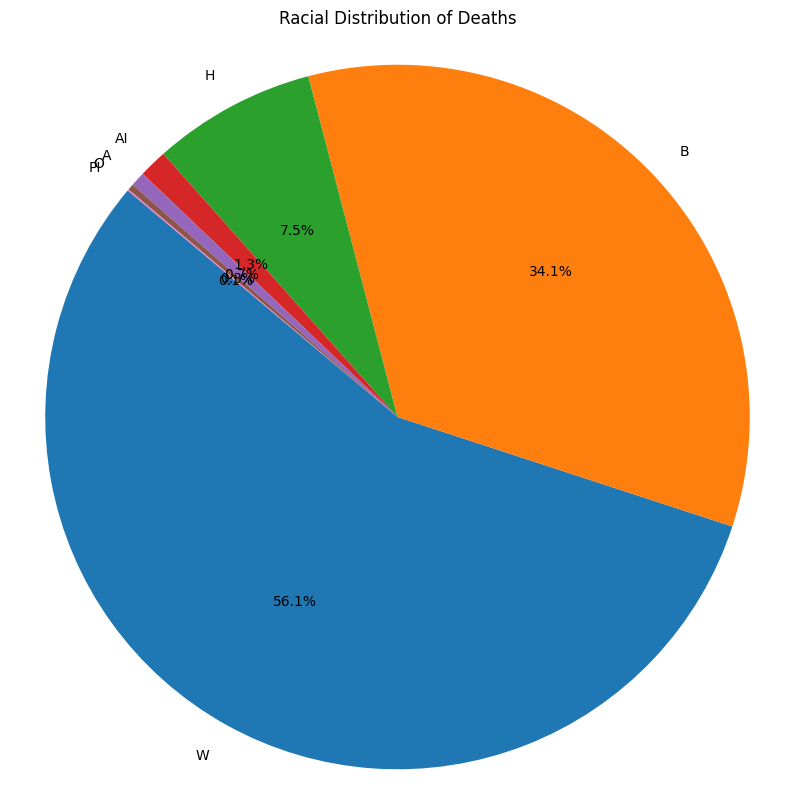

In [39]:
racial_counts = df['race'].value_counts()

plt.figure(figsize=(10, 10))
plt.pie(racial_counts, labels=racial_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Racial Distribution of Deaths')
plt.axis('equal')
plt.show()

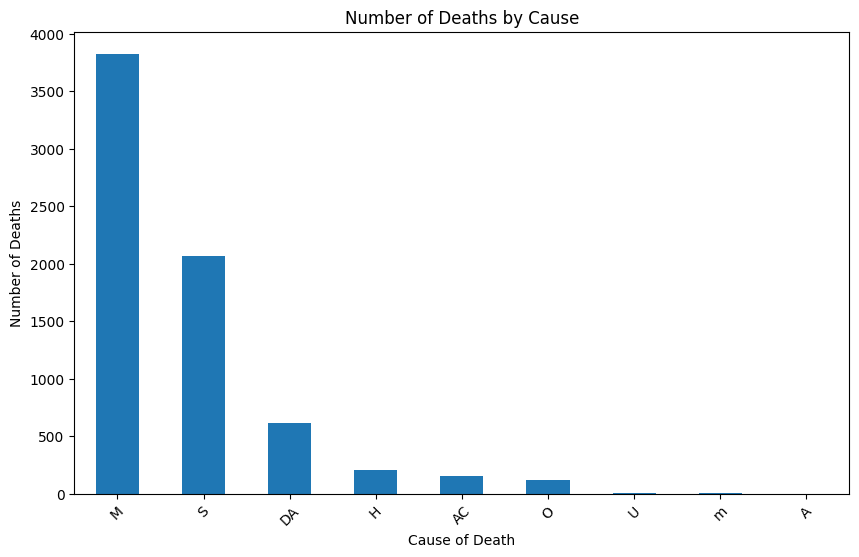

In [29]:
cause_counts = df['cause_short'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
cause_counts.plot(kind='bar')
plt.xlabel('Cause of Death')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths by Cause')
plt.xticks(rotation=45)
plt.show()

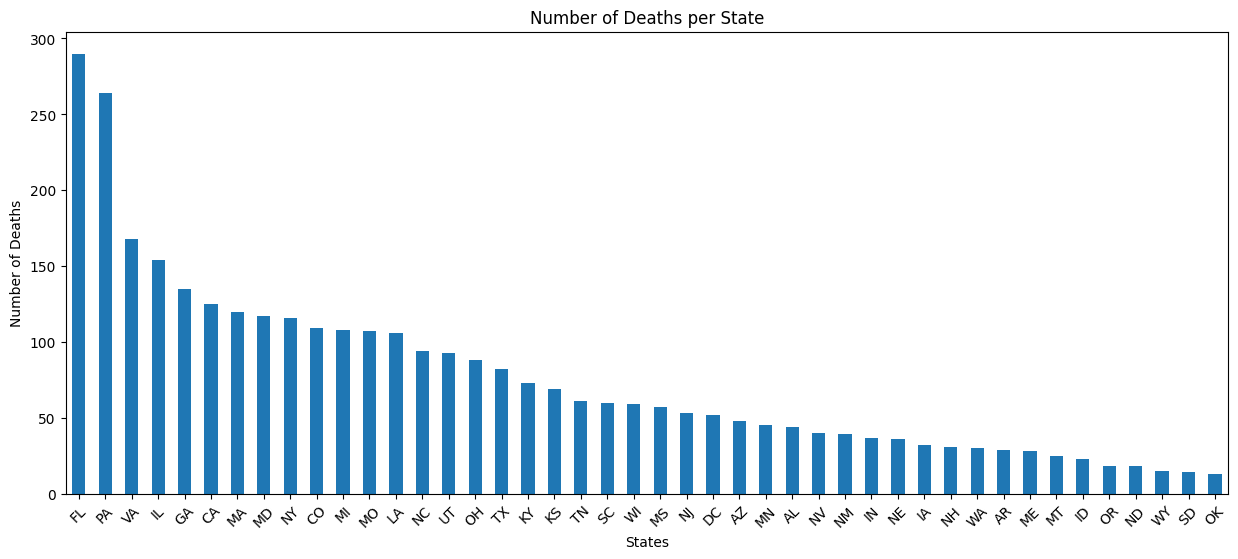

In [34]:
state_counts = df['state'].value_counts().sort_values(ascending=False)

# Create the bar chart
plt.figure(figsize=(15, 6))
state_counts.plot(kind='bar')
plt.xlabel('States')
plt.ylabel('Number of Deaths')
plt.title('Number of Deaths per State')
plt.xticks(rotation=45)
plt.show()

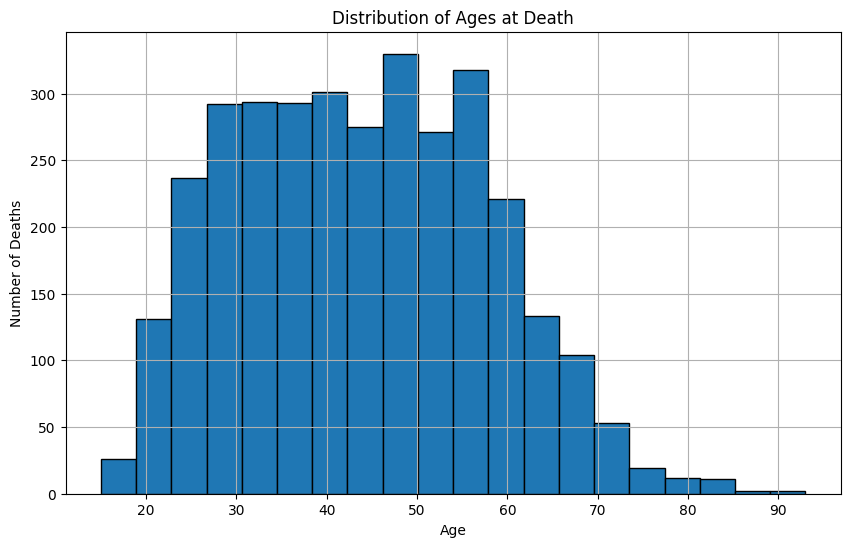

In [31]:
df = df.dropna(subset=['age'])

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df = df.dropna(subset=['age'])

plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Number of Deaths')
plt.title('Distribution of Ages at Death')
plt.grid(True)
plt.show()

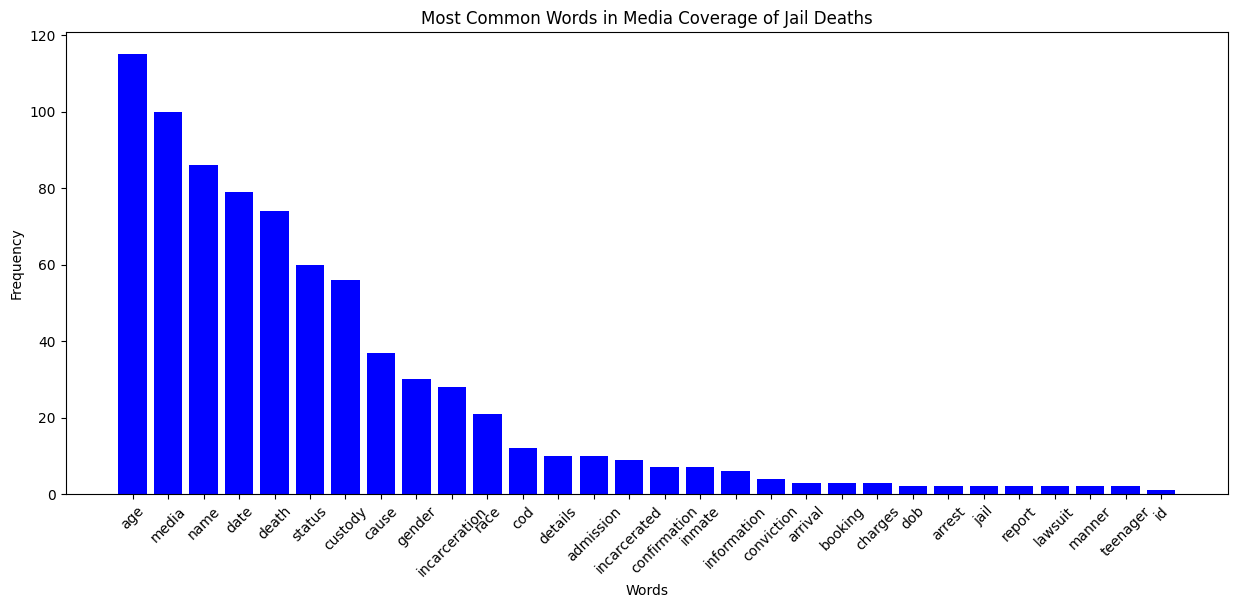

In [50]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

df = df.dropna(subset=['what_info_from_media'])

def clean_tokenize(text):
    tokens = word_tokenize(text.lower())
    tokens = [word for word in tokens if word.isalpha() and word not in stopwords.words('english')]
    return tokens

df['tokens'] = df['what_info_from_media'].apply(clean_tokenize)

all_words = [word for tokens in df['tokens'] for word in tokens]
freq_dist = FreqDist(all_words)

freq_df = pd.DataFrame(freq_dist.most_common(30), columns=['Word', 'Frequency'])

plt.figure(figsize=(15, 6))
plt.bar(freq_df['Word'], freq_df['Frequency'], color='blue')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Most Common Words in Media Coverage of Jail Deaths')
plt.xticks(rotation=45)
plt.show()